<a href="https://colab.research.google.com/github/neSTORY/Deeplearning_Zero_to_All/blob/master/Softmax_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multinomial Classification(Softmax)

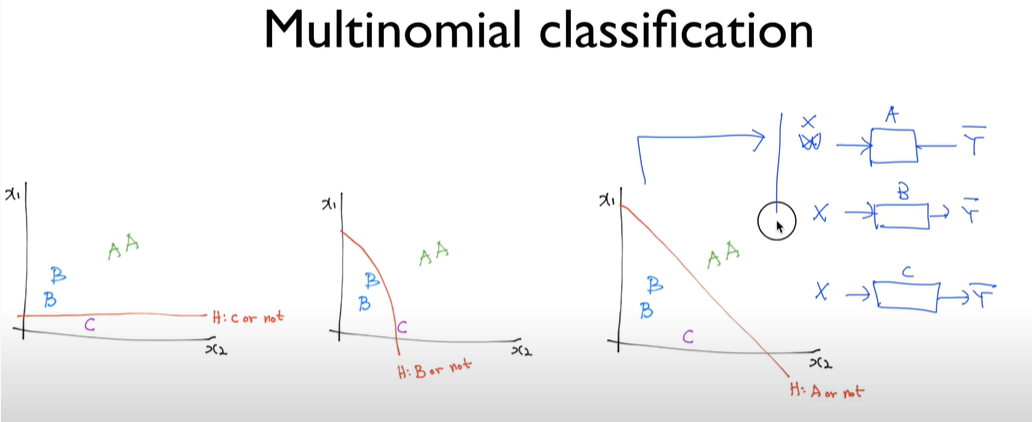

성적을 A,B,C로 나눠주는 분류기가 필요하다고 가정하면 이중 분류와 달리 기준이 3개가 필요하다.
- A인지 아닌지
- B인지 아닌지
- C인지 아닌지


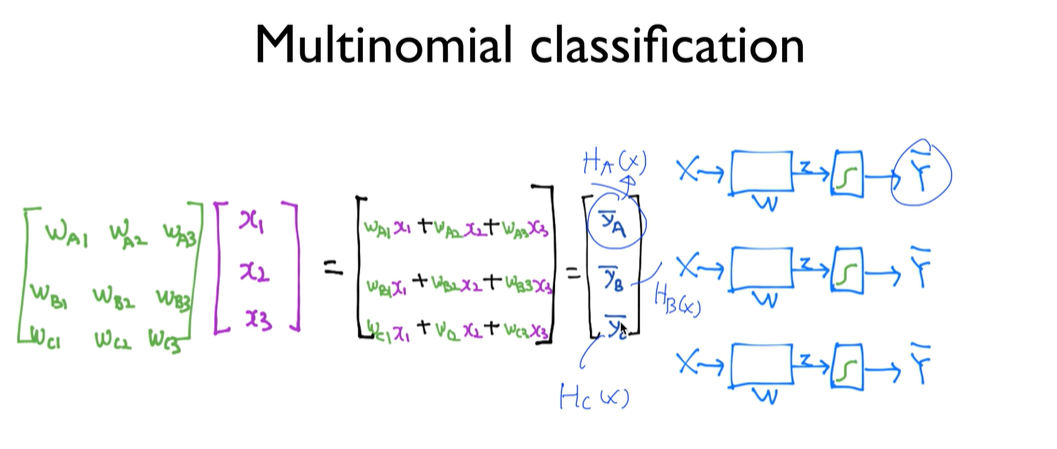

A,B,C를 구분하는 분류기가 필요하다 할 때 가중치 W를 행렬로 표현하면 위의 그림과 같다.

행렬 W와 x를 점곱하여 나온 결과 (3,1)은 각각 A분류기, B분류기, C분류기의 결과로 나온다.

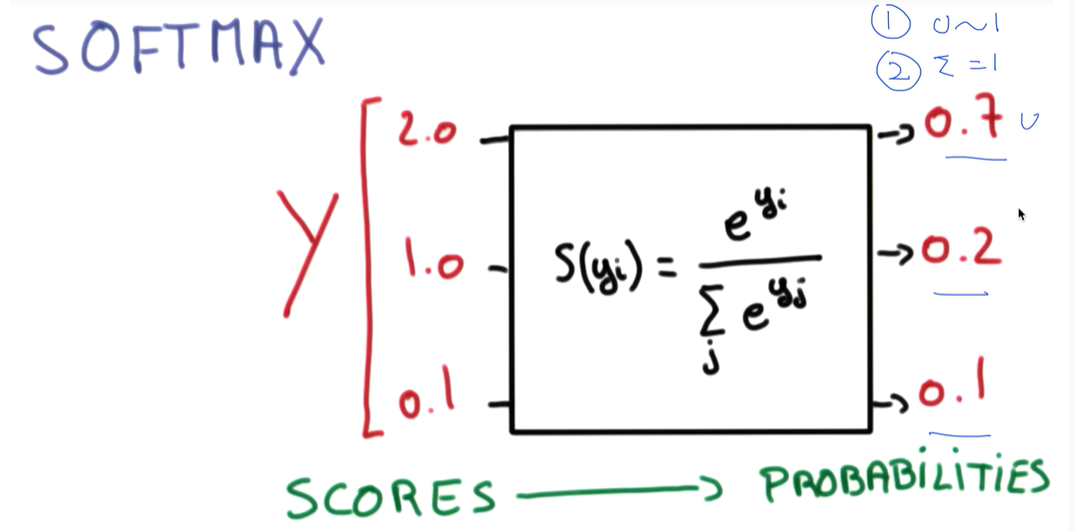

그런데 원하는 출력값의 형태를
1. 0 ~ 1 사이의 값
2. 출력값들의 합이 1

으로 만들기 위해서 활성화 함수를 거치게 된다.

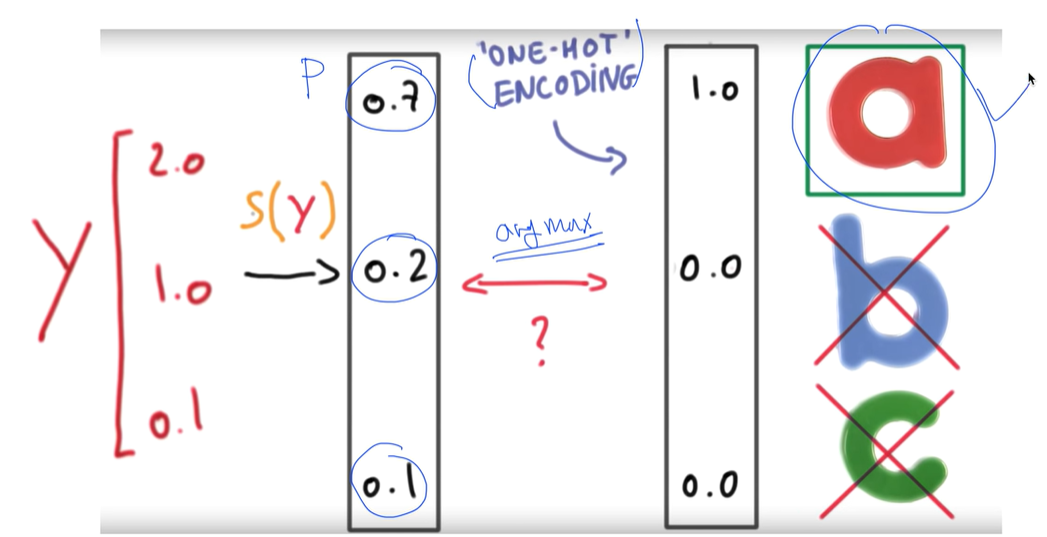

- 이렇게 되면 출력값들을 확률로 볼 수 있게 된다.
- 이 확률을 다시 가장 큰 값을 1 나머지는 0으로 바꿔준다.

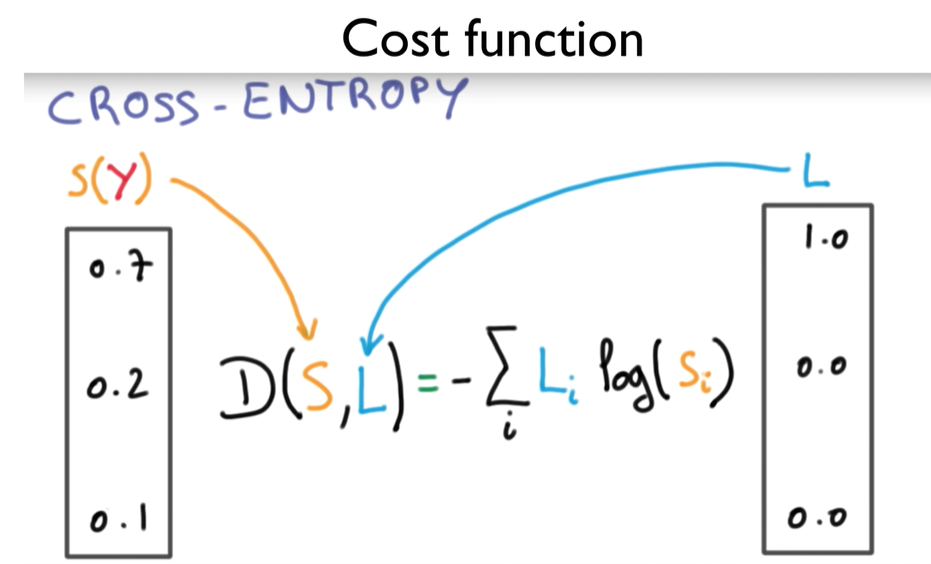

cost를 구하는 식은 위 그림과 같다.<br>
D(S,L)에서 S는 출력값이 활성화 함수를 거쳐 나온 결과들, L은 라벨이다.

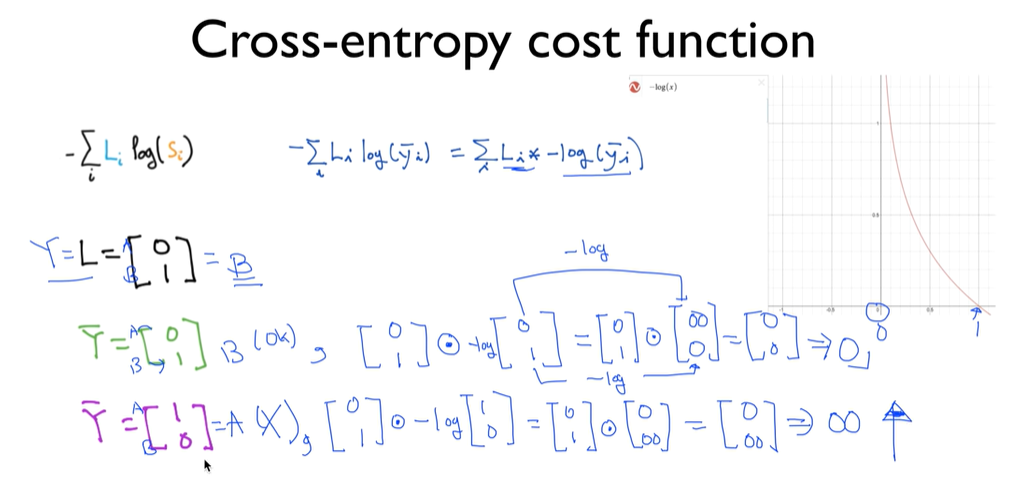

자, 그러면 라벨이 B([0,1])이고 예측결과가 맞은 경우, 틀린 경우에 cost값을 구하는 과정을 보자

- 맞은 경우 : Li *(요소 곱-행렬곱x,주의) - log(yhati)
  <br>이 경우에는 yhat의 첫 요소는 -log0 이므로 무한대, 두 번째 요소는 -log1로 0이 나오게 된다.
  <br>[0,1]과 요소 곱을 하면 0이 나와 cost값이 최소가 됐다.
- 틀린 경우 : 첫 번째 요소 -log1 => 0, 두번째 요소 -log0 => 무한대
  <br> [0,1]과 요소 곱을 하면 무한대가 나와서 cost값이 굉장히 크게 된다.

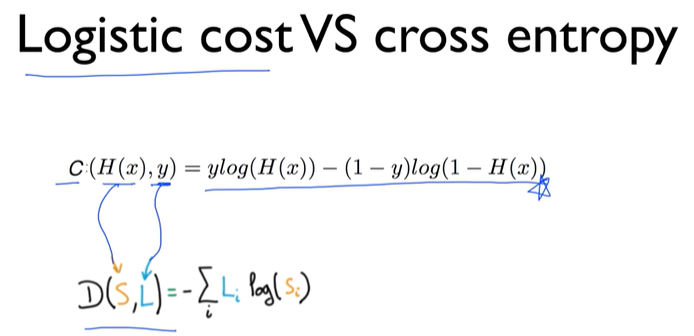

Logistic cost와 방금 배운 cross entrop cost의 식은 사실 같은 것 이다.(표현만 다를 뿐, 구조는 같음!)
<br>Why?
- H(x)는 0 ~ 1 사이의 값을 가지는 sigmoid를 거쳐 S와 같은 범위이다.
- 첫 번째 항의 y, 두 번째 항의 (1-y)는 라벨이 1인 경우, 0인 경우에 따라 switch 해주기 위한 요소이다. <br> 이는 크로스 엔트로피에서도 요소곱으로 진행했다.


## code

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
tf.enable_eager_execution()
tf.set_random_seed(777)  # for reproducibility
tfe = tf.contrib.eager

TensorFlow 1.x selected.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
          
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

In [ ]:
x_data = np.asarray(x_data, dtype="float32")
y_data = np.asarray(y_data, dtype="float32")

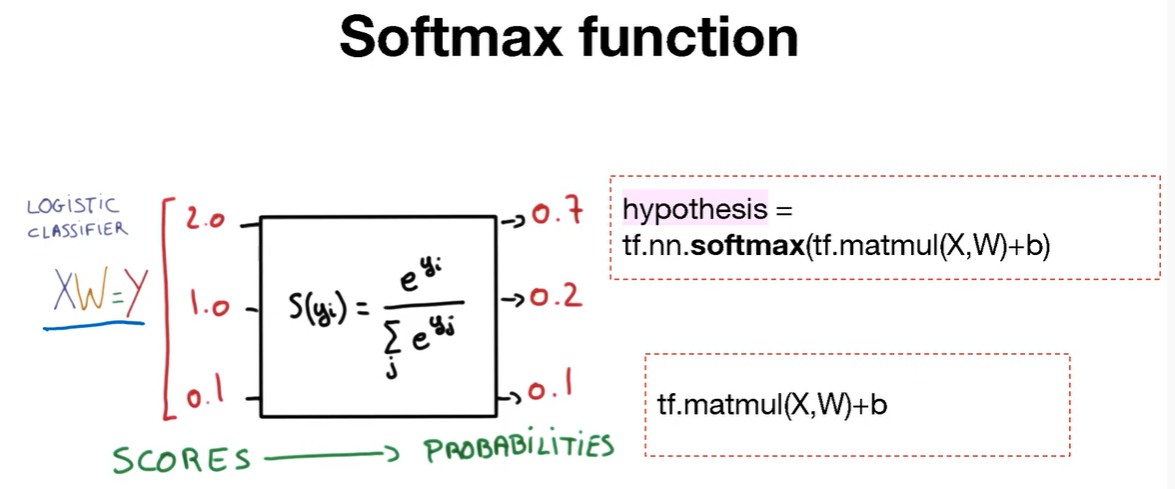

softmax의 기능을 code로 구현하기 전에 잠시 과정을 살펴보자.

가장 기본적인 회귀식은 역시 동일하다.<br>
X(input_data) * W(weight) = Y(prediction)

위 회귀식을 통해 나온 값을 softmax를 취해준다.
=> 2.0, 1.0, 0.1 ------> 0.7, 0.2, 0.1

In [ ]:
# number of class
nb_classes = 3

# wieght and bias setting
W = tf.Variable(tf.random_normal([4, nb_classes]), name="weight") # x_data의 shape이 (8,4)이기 때문에 행을 4로 둔다.
b = tf.Variable(tf.random_normal([nb_classes]), name = "bias")
variable = [W, b]

In [ ]:
print(W)
print(b)

<tf.Variable 'weight:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.7706481 ,  0.37335402, -0.05576323],
       [ 0.00358377, -0.5898363 ,  1.5702795 ],
       [ 0.2460895 , -0.09918973,  1.4418385 ],
       [ 0.3200988 ,  0.526784  , -0.7703731 ]], dtype=float32)>
<tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([-1.3080608 , -0.13253094,  0.5513761 ], dtype=float32)>


In [ ]:
def hypothesis(X):
  hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)

  return hypothesis

In [ ]:
# softmax onehot test
sample_data = [[8,2,1,4]]
sample_data = np.array(sample_data, dtype="float32")

# output
tf.nn.softmax(tf.matmul(sample_data, W)+ b) # 첫 번째 레이블이 선택됨(가장 크기 때문)

<tf.Tensor: id=64, shape=(1, 3), dtype=float32, numpy=array([[0.9302204 , 0.06200533, 0.00777428]], dtype=float32)>

In [ ]:
# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(y_data * tf.log(hypothesis(x_data)), axis=1))

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [ ]:
# cost 구하는 함수
def cost_fn(X, y):
  logits = hypothesis(X)
  cost = -tf.reduce_sum(y*tf.log(logits), axis=1)
  cost_mean = tf.reduce_mean(cost)

  return cost_mean

print(cost_fn(x_data, y_data))

tf.Tensor(6.07932, shape=(), dtype=float32)


In [ ]:
# 기울기 구하는 함수
def grad_fn(X, y):
  with tf.GradientTape() as tape:
    cost = cost_fn(X, y)
    grads = tape.gradient(cost, variable) # variable = [W, b]
    # tape.gradient(y, x) y: 미분하려는 식, x: 식의 변수(편미분 대상)
    return grads

print(grad_fn(x_data, y_data))

[<tf.Tensor: id=258, shape=(4, 3), dtype=float32, numpy=
array([[ 0.06914607, -0.6509784 ,  0.5818323 ],
       [-1.5221257 , -1.214863  ,  2.7369885 ],
       [-1.2473828 , -1.7611003 ,  3.008483  ],
       [-1.2014606 , -1.8659233 ,  3.0673838 ]], dtype=float32)>, <tf.Tensor: id=257, shape=(3,), dtype=float32, numpy=array([-0.15212913, -0.34219202,  0.4943211 ], dtype=float32)>]


In [ ]:
# 훈련
def fit(X, y, epochs=2000, verbose=100):
  for i in range(epochs):
    grads = grad_fn(X, y)
    optimizer.apply_gradients(zip(grads, variable))
    if (i==0) | ((i+1)%verbose==0):
      print("Loss at epoch %d : %f"%(i+1, cost_fn(X,y).numpy()))

In [ ]:
fit(x_data, y_data)

Loss at epoch 1 : 2.849417
Loss at epoch 100 : 0.684151
Loss at epoch 200 : 0.613813
Loss at epoch 300 : 0.558205
Loss at epoch 400 : 0.508306
Loss at epoch 500 : 0.461059
Loss at epoch 600 : 0.415072
Loss at epoch 700 : 0.369636
Loss at epoch 800 : 0.324533
Loss at epoch 900 : 0.280720
Loss at epoch 1000 : 0.246752
Loss at epoch 1100 : 0.232798
Loss at epoch 1200 : 0.221645
Loss at epoch 1300 : 0.211476
Loss at epoch 1400 : 0.202164
Loss at epoch 1500 : 0.193606
Loss at epoch 1600 : 0.185714
Loss at epoch 1700 : 0.178415
Loss at epoch 1800 : 0.171645
Loss at epoch 1900 : 0.165350
Loss at epoch 2000 : 0.159483


In [ ]:
# prediction

a = hypothesis(x_data)

print(a)
print(tf.argmax(a,1))
# argmax : (a, 1) a의 인자값 중 가장 큰 인자의 인덱스를 반환
# 두 번째 인자 값은 1차원인 배열인 경우 0, 2차원 배열인 경우 1 이런식으로 사용
print(tf.argmax(y_data, 1)) # matches with y_data

tf.Tensor(
[[2.1975954e-06 1.2331175e-03 9.9876475e-01]
 [1.1288590e-03 8.1546679e-02 9.1732454e-01]
 [2.2205469e-07 1.6418649e-01 8.3581328e-01]
 [6.3921457e-06 8.5045445e-01 1.4953916e-01]
 [2.6150835e-01 7.2644705e-01 1.2044546e-02]
 [1.3783254e-01 8.6214006e-01 2.7417505e-05]
 [7.4242175e-01 2.5754121e-01 3.6978530e-05]
 [9.2197561e-01 7.8023843e-02 6.0005704e-07]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


## code 2

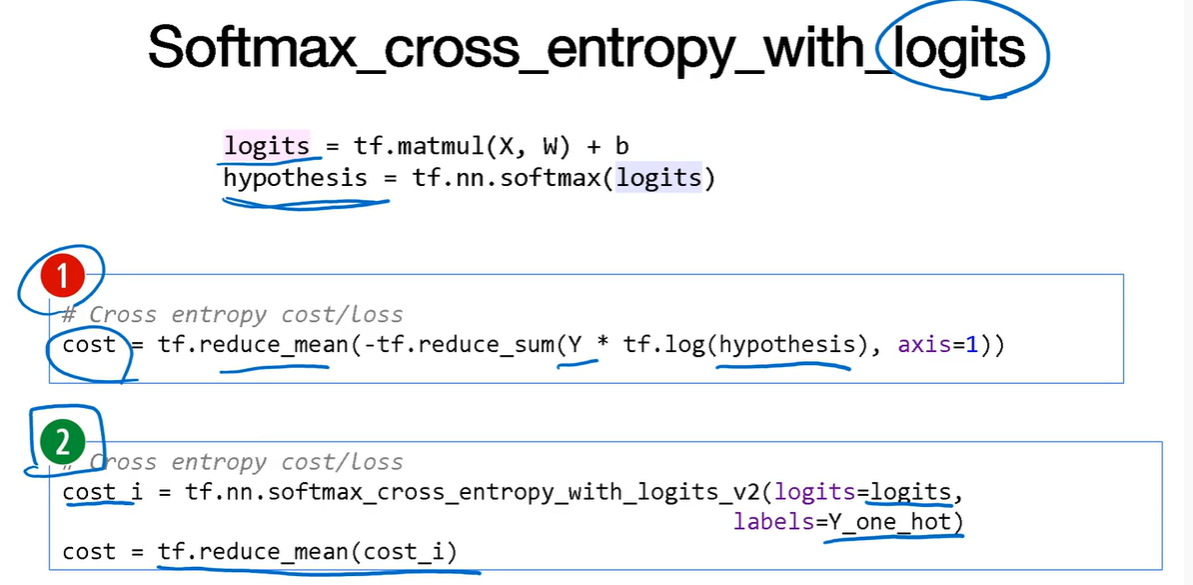

cost 값을 구하는 방식을 2가지로 살펴보자.
- 1번 : 평소에 구하던 방식으로 softmax에 들어가는 logit과 hypothesis(예측 식)을 정의해두고 이 정의한 변수들을 다시 라벨과 곱하여 합쳐주고 평균을 구하는 방식이다.

- 2번 : 함수를 통해 인자값으로 logit과 라벨만 넣어주면 cost를 구할 수 있다.

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
xy = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/DeepLearning_for_all/data/data-04-zoo.csv",
                delimiter=",",
                dtype = "float32")

x_data = xy[:, 0:-1]
y_data = xy[:, -1]

nb_classes = 7  # 0 ~ 6

# Make Y data as onehot shape
Y_one_hot = tf.one_hot(y_data.astype(np.int32), nb_classes)

print(x_data.shape, Y_one_hot.shape)

(101, 16) (101, 7)


In [ ]:
# weight and bias setting
W = tf.Variable(tf.random_normal([16, nb_classes]), name = "weight")
b = tf.Variable(tf.random_normal([nb_classes]), name = "bais")
variable = [W, b]

# tf.nn.softmax computes softmax activations
def logit_fn(X):
  return tf.matmul(X,W) + b

def hypothesis(X):
  return tf.nn.softmax(logit_fn(X))

def cost_fn(X,y):
  logits = logit_fn(X)
  cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits,
                                                      labels = y)
  cost = tf.reduce_mean(cost_i)
  return cost

def grad_fn(X, y):
  with tf.GradientTape() as tape:
    loss = cost_fn(X, y)
    grads = tape.gradient(loss, variable)
    return grads

def prediction(X, y):
  pred = tf.argmax(hypothesis(X), 1)
  correct_prediction = tf.equal(pred, tf.argmax(y, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  return accuracy

In [ ]:
x_data[0].reshape(-1,16)

array([[1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 4., 0., 0., 1.]],
      dtype=float32)

In [ ]:
y_data.shape

(101,)

In [ ]:
tf.argmax(Y_one_hot,1)

<tf.Tensor: id=299684, shape=(101,), dtype=int64, numpy=
array([0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 1, 3, 6, 6, 6, 1, 0, 3, 0, 1, 1,
       0, 1, 5, 4, 4, 0, 0, 0, 5, 0, 0, 1, 3, 0, 0, 1, 3, 5, 5, 1, 5, 1,
       0, 0, 6, 0, 0, 0, 0, 5, 4, 6, 0, 0, 1, 1, 1, 1, 3, 3, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 6, 3, 0, 0, 2, 6, 1, 1, 2, 6, 3, 1, 0, 6, 3, 1,
       5, 4, 2, 2, 3, 0, 0, 1, 0, 5, 0, 6, 1])>

In [ ]:
def fit(X, y, epochs=1000, verbose=100):
    optimizer =  tf.train.GradientDescentOptimizer(learning_rate=0.1)

    for i in range(epochs):
        grads = grad_fn(X, y)
        optimizer.apply_gradients(zip(grads, variable))
        if (i==0) | ((i+1)%verbose==0):
#             print('Loss at epoch %d: %f' %(i+1, cost_fn(X, Y).numpy()))
            acc = prediction(X, y).numpy()
            loss = cost_fn(X, y).numpy() 
            print('Steps: {:5} Loss: {:10.4f}, Acc: {:10.4f}'.format(i+1, loss, acc))

fit(x_data, Y_one_hot)

Steps:     1 Loss:     0.1050, Acc:     0.9901
Steps:   100 Loss:     0.0956, Acc:     1.0000
Steps:   200 Loss:     0.0878, Acc:     1.0000
Steps:   300 Loss:     0.0812, Acc:     1.0000
Steps:   400 Loss:     0.0755, Acc:     1.0000
Steps:   500 Loss:     0.0706, Acc:     1.0000
Steps:   600 Loss:     0.0664, Acc:     1.0000
Steps:   700 Loss:     0.0626, Acc:     1.0000
Steps:   800 Loss:     0.0592, Acc:     1.0000
Steps:   900 Loss:     0.0563, Acc:     1.0000
Steps:  1000 Loss:     0.0536, Acc:     1.0000
